# (공부) Datamining HW
> 첫번째 과제, Linear Regression, Logistic Regression
- toc:true
- branch: master
- badges: true
- comments: true
- author: 김하영
- categories: [Study]

In [4]:
setwd("/home/khy/Desktop/2022STAT/datamining")

library(tidyverse)
library(dplyr)
library(gridExtra)
library(ggplot2)
library(tidyr)

### Linear Regression

**1. 설명변수가 1개(X)인고, 반응변수가 1개(Y )인데이터를 가지고 있다고 하자. (n = 100) 그리고 다음의 두 모형(linear regression, cubic regression)을 적합시키려고 한다.**  

$Y = \beta_0 + \beta_1X + \epsilon$

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$  

(a) 실제 X, Y 가 선형(linear)관계가 있다고 가정 하자. 모델 (1),(2)의 SSE(잔차제곱합)의 크기를 비교할 수 있는지 설명하여라

- 시뮬레이션을 해보기 위해 임의로 만든 모델

In [62]:
set.seed(1)
x1=runif(100)
y1=3+3.5*x1+rnorm(100)
y2=3+1.5*x1+3*x1^2+4*x1^3+rnorm(100)

In [13]:
#선형관계가 있다고 가정하기
summary(lm(y1~x1))
anova(lm(y1~x1))


Call:
lm(formula = y1 ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84978 -0.56222 -0.08707  0.52427  2.51661 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.8207     0.2058   13.71   <2e-16 ***
x1            3.8123     0.3535   10.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9411 on 98 degrees of freedom
Multiple R-squared:  0.5428,	Adjusted R-squared:  0.5381 
F-statistic: 116.3 on 1 and 98 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,103.02483,103.0248322,116.3342,2.403925e-18
Residuals,98,86.78818,0.8855937,NA,NA


In [17]:
#선형관계가 있다고 가정하기
summary(lm(y1~x1+I(x1^2)+I(x1^3)))
anova(lm(y1~x1+I(x1^2)+I(x1^3)))


Call:
lm(formula = y1 ~ x1 + I(x1^2) + I(x1^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85466 -0.59246 -0.09722  0.54144  2.48360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6348     0.4645   5.672 1.49e-07 ***
x1            5.6195     3.7246   1.509    0.135    
I(x1^2)      -4.1677     8.5256  -0.489    0.626    
I(x1^3)       2.6800     5.6682   0.473    0.637    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9496 on 96 degrees of freedom
Multiple R-squared:  0.5439,	Adjusted R-squared:  0.5297 
F-statistic: 38.16 on 3 and 96 DF,  p-value: 2.523e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,103.02483221,103.02483221,114.24694192,4.971201e-18
I(x1^2),1,0.01635999,0.01635999,0.01814203,8.931371e-01
I(x1^3),1,0.20159472,0.20159472,0.22355368,6.374186e-01
Residuals,96,86.57022872,0.90177322,NA,NA


(b) 실제 X, Y 가 비선형(non-linear)관계가 있다고 가정 하자. 대신 실제 모형에 대한 정보는 없다. 모델 (1),(2)의 SSE(잔차제곱합)의 크기를 비교할 수 있는지 설명하여라.

In [18]:
#비선형관계가 있다고 가정하기
summary(lm(y2~x1))
anova(lm(y2~x1))


Call:
lm(formula = y2 ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2064 -0.7806 -0.0233  0.5791  3.4723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6833     0.2770   13.29   <2e-16 ***
x1            7.9619     0.4758   16.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.267 on 98 degrees of freedom
Multiple R-squared:  0.7408,	Adjusted R-squared:  0.7381 
F-statistic:   280 on 1 and 98 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,449.3549,449.354925,280.0482,1.734342e-30
Residuals,98,157.2471,1.604563,NA,NA


In [19]:
#비선형관계가 있다고 가정하기
summary(lm(y2~x1+I(x1^2)+I(x1^3)))
anova(lm(y2~x1+I(x1^2)+I(x1^3)))


Call:
lm(formula = y2 ~ x1 + I(x1^2) + I(x1^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.88281 -0.60007 -0.06635  0.64335  2.31422 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.6628     0.5158  10.979   <2e-16 ***
x1           -2.6415     4.1356  -0.639    0.525    
I(x1^2)       9.8637     9.4662   1.042    0.300    
I(x1^3)       0.6755     6.2936   0.107    0.915    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.054 on 96 degrees of freedom
Multiple R-squared:  0.8241,	Adjusted R-squared:  0.8186 
F-statistic: 149.9 on 3 and 96 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,449.35492460,449.35492460,404.18948899,3.511253e-36
I(x1^2),1,50.50699183,50.50699183,45.43044730,1.175750e-09
I(x1^3),1,0.01280619,0.01280619,0.01151902,9.147538e-01
Residuals,96,106.72734927,1.11174322,NA,NA


---

**2. ’Auto.csv’ 데이터를 이용하여 단순선형 회귀 모형을 적합한다.**

(a) 반응변수 mpg, 설명변수는 horsepower로 하는 단순선형회귀모형을 적합 시킨 후 summary() 함수의 결과 확인하고 다음의 물음에 답하여라.

In [66]:
auto <- read.csv('Auto(1).csv', stringsAsFactors = F)
head(auto)
### 데이터 타입 확인
str(auto$horsepower)
str(auto$mpg)
### 데이터 타입 변경
auto$horsepower=as.numeric(auto$horsepower)
### 결측치 제거
print(count(auto))
print(count(auto %>% filter(horsepower!="NA")))  #5개 제거
auto = auto %>% filter(horsepower!="NA")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


 chr [1:397] "130" "165" "150" "150" "140" "198" "220" "215" "225" "190" ...
 num [1:397] 18 15 18 16 17 15 14 14 14 15 ...


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


    n
1 397
    n
1 392


- 단순선형회귀분석 전 horsepower가 문자형으로 확인되어 숫자형으로 변경 후 결측값 제거를 진행함. 총 397개 데이터에서 결측치 5개를 제거하여 392개 데이터로 분석함. 

In [68]:
a=lm(y~x)
summary(a)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
x           -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


- x=horsepower, y=mpg 회귀분석 summary결과를 요약하면 아래와 같음. 
    - 회귀계수 유의성 검정 결과, 유의확률이 0에 가까워 horsepower는 유의하다고 할 수 있음.
    - 회귀직선 유의성 검정 결과, 유의확률은 0에 가까워 이 모델은 통계적으로 유의하다고 할 수 있음.
    - $R^2=0.6059$으로 비교적 설명력이 높게 나타남.  


<표. 회귀계수 유의성 검정 결과>
    
||Estimate|Std.Error|t|p-value|
|---|---|---|---|---|
|(Intercept)|39.935861|0.717499|55.66|<2e-16|
|x|-0.157845|0.006446|-24.49|<2e-16|


<표. 회귀직선 유의성 검정 결과>

||DF|Sum Sq|Mean Sq|F|p-value|
|---|---|---|---|---|---|
|x|1|14433.1|14433.1|599.72|<2.2e-16|
|Residuals|390|9385.9|24.1|||

Multiple $R^2 = 0.6059$, Adjusted $R^2 = 0.6049$

`Q.` 두 변수 사이에 관계

- 두 변수 간 관계 여부를 확인하기 위해 산점도를 그려보면, **x가 증가함에 따라 y가 감소하는 경향**을 보임.
- 상관계수는 $-0.7784268$으로 **음의 관계**를 가지고 있으며, 절대값이 $0.7$보다 크기 때문에 **매우 강한 관련성**을 가진다고 해석할 수 있음.
- 상관분석 결과 또한 p-value$<2.2e-16 \approx 0$으로 상관계수가 0이라는 귀무가설을 기각함.

In [67]:
cor.test(x,y,method = "pearson")


	Pearson's product-moment correlation

data:  x and y
t = -24.489, df = 390, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8146631 -0.7361359
sample estimates:
       cor 
-0.7784268 


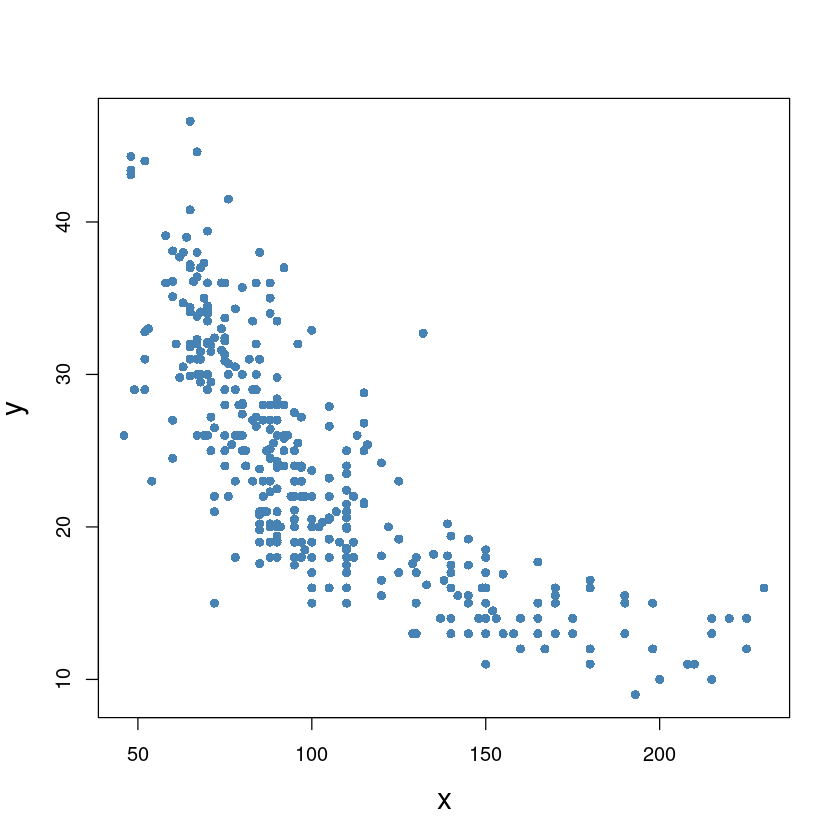

In [64]:
y=auto$mpg
x=auto$horsepower
par(mfrow=c(1,1))
plot(x,y, pch=16, col='steelblue', 
     lwd=2, cex.lab=1.5)

`Q.`  horsepower의 값이 98일 때, mpg의 예측값과 95% 신뢰구간
- 추정된 단순선형회귀모형은 $\hat{y} = 39.935861 -0.157845x$
- $x=98$일 때 예측값은 $24.46708$이며 95% 신뢰구간은 $(23.97308, 24.96108)$임.

In [69]:
newob = data.frame(x=c(98))
b=predict(a, newob, interval="confidence")
b

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [72]:
predict(a, 
        newdata = data.frame(x = 98), 
        interval = "confidence", level = 0.95) #교수님 풀이

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [ ]:
predict.lm

```python
predict(object, newdata, se.fit = FALSE, scale = NULL, df = Inf,
        interval = c("none", "confidence", "prediction"),
        level = 0.95, type = c("response", "terms"),
        terms = NULL, na.action = na.pass,
        pred.var = res.var/weights, weights = 1, ...)
```

`Q.`  회귀직선을 추가한 산점도
- 위에서 확인한 바와 같이 회귀직선은 우하향하는 모습을 보임.
> warning : x,y 순서를 항상 조심하자

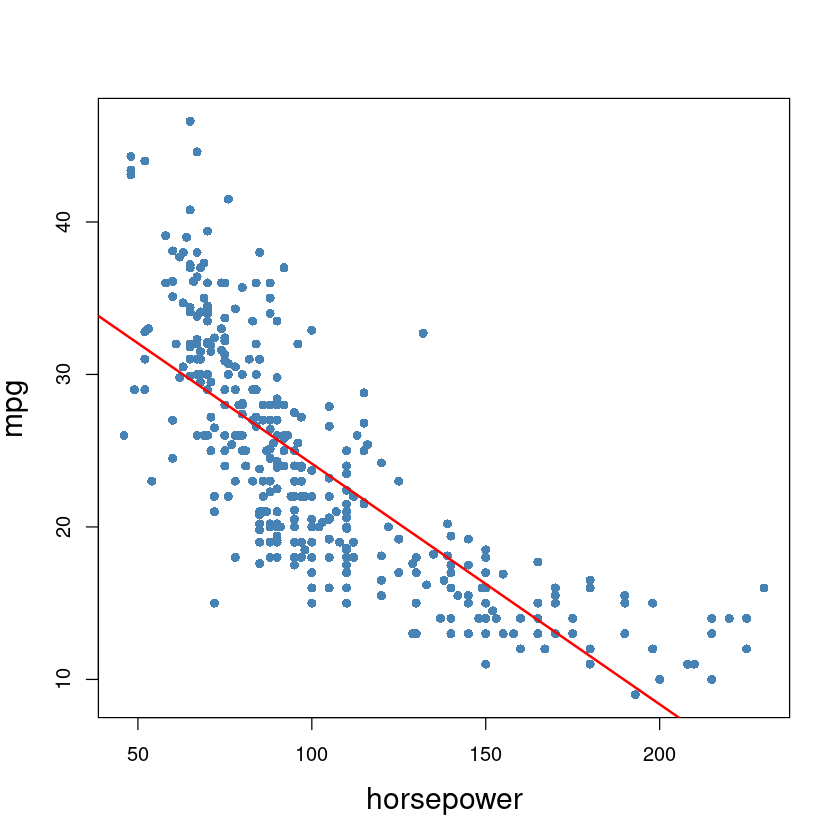

In [74]:
par(mfrow=c(1,1))
plot(x,y, pch=16, col='steelblue', 
     lwd=2, cex.lab=1.5,
     xlab="horsepower", ylab="mpg")
abline(a, col='red', lwd=2)

---

**3. 다중공선성(collinearity)**

In [75]:
set.seed(1)
x1=runif(100)
x2=0.5*x1+rnorm(100)/10
y=2+2*x1+0.3*x2+rnorm(100)

In [76]:
dt=data.frame(x1,x2,y)

(a) 회귀모형 : $y_i = 2 + 2*x_{i1} + 0.3*x_{i2} + \epsilon_i$  $i=1,2,\dots,100$
- 회귀모수 $\beta_0 = 2, \beta_1 = 2, \beta_2 = 0.3$

(b) 두 설명변수 x1과 x2 사이에 상관관계(correlation)이 있는가? 산점도를 그려서 확인하여라.
- 설명변수 간 상관관계를 확인하기 위해 산점도를 그린 결과, x1이 증가함에 따라 x2도 증가하는 경향을 보여 양의 관계가 있을 것으로 해석됨.
- 상관분석을 진행한 결과 상관계수는 $0.835121$로 매우 강한 양의 상관관계가 있는 것으로 확인되었으며, $p-value<2.2e-16 \approx 0$으로 두 변수 간 상관관계가 없다는 귀무가설을 기각함.


	Pearson's product-moment correlation

data:  dt$x1 and dt$x2
t = 15.03, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7640291 0.8861771
sample estimates:
      cor 
0.8351212 


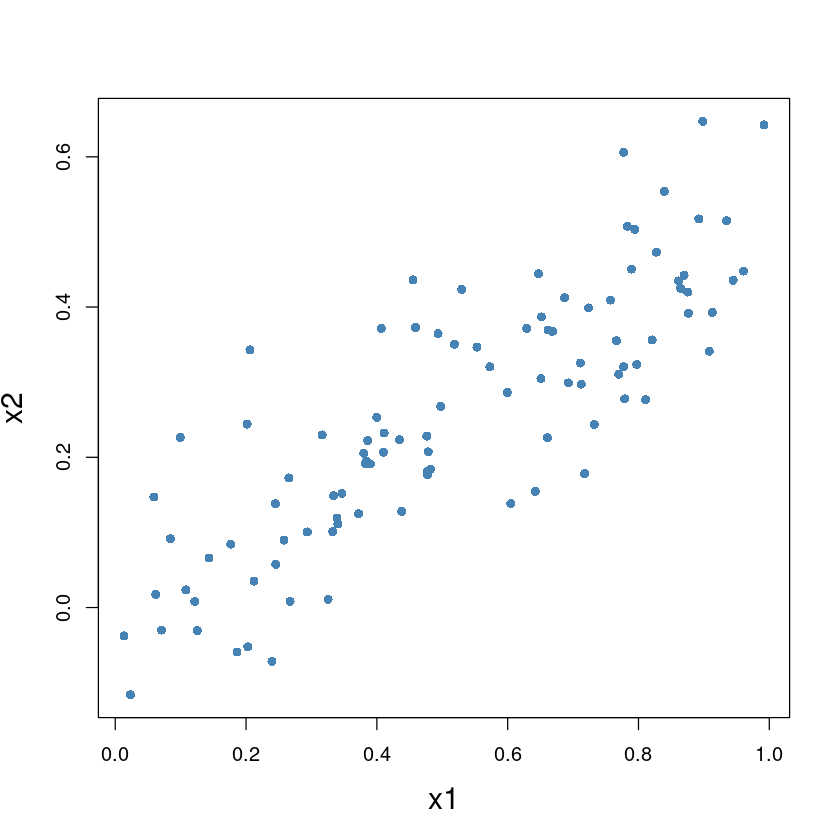

In [77]:
plot(dt$x1,dt$x2, pch=16, col='steelblue', 
     lwd=2, cex.lab=1.5, xlab="x1", ylab="x2")
cor.test(dt$x1,dt$x2,method = "pearson")

(c) 생성된 데이터를 이용하여 (a) 모형의 회귀계수를 추정하여라. 실제 회귀계수와 추정된 회귀계수와
비교하여라. H0 : β1 = 0을 기각할 수 있는가? H0 : β2 = 0을 기각할 수 있는가?

In [78]:
multi=lm(y~x1+x2, data=dt)
summary(multi)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


- 추정된 회귀식은 $\hat{y} = 2.1305 + 1.4396*x_1 + 1.0097*x_2$임. Multiple R-squared$=0.2088$, Adjusted R-squared$=0.1925$로 설명력은 비교적 작게 나타났으나 p-value$=1.164e-05 \approx 0.00001$로 유의한 모델로 확인됨.
- $\hat{\beta}_0$과 $\hat{\beta}_1$은 실제 회귀계수인 $2$에 가까운 값을 보이나, $\hat{\beta}_2$는 실제 회귀계수인 $0.3$보다 비교적 작은 값을 보이며 다른 회귀계수 추정량 대비 실제 회귀계수와의 값 차이가 크게 나타남.
- 회귀계수 유의성 검정 결과 $\hat{\beta}_1$의 p-value는 $0.0487$으로 유의수준 0.5에서 유의한 값을 보여 귀무가설을 기각할 수 없으나, $\hat{\beta}_2$의 p-value는 $0.3754$로 유의수준 0.5보다 크게 나타나 귀무가설을 기각할 수 없음.  
- 그리고 x2의 s.e가 크게 나타나 데이터가 안정적이지 않다고 할 수 있음.

<표. 회귀계수 유의성 검정 결과>
    
||Estimate|Std.Error|t|p-value|
|---|---|---|---|---|
|(Intercept)|2.1305|0.2319|9.188|7.61e-15$\approx 0$|
|x1|1.4396|0.7212|1.996|0.0487|
|x2|1.0097|1.1337|0.891|0.3754|

(d) 이번에는 x1만을 이용한 단순선형회귀 모형을 적합하여라. 결과를 분석하여라. H0 : β1 = 0을 기각할
수 있는가?

In [79]:
m1=lm(y~x1, data=dt)
summary(m1)


Call:
lm(formula = y ~ x1, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


- 단순선형회귀모형을 적합한 결과, 추정된 회귀식은 $\hat{y} = 2.1124 + 1.9759*x_1$임. Multiple R-squared $=0.2024$, Adjusted R-squared$=0.1942$로 설명력은 비교적 작게 나타났으나 p-value$=2.66e-06 \approx 0$로 유의한 모델로 확인됨.
- 회귀계수 유의성 검정 결과, 이전 중회귀분석 결과와 유사하게 p-value가 0에 가깝게 나타나 $\beta_1 = 0$이라는 귀무가설을 기각함.

 
<표. 회귀계수 유의성 검정 결과>
    
||Estimate|Std.Error|t|p-value|
|---|---|---|---|---|
|(Intercept)|2.1124|0.2307|9.155|8.27e-15 $\approx 0$|
|x1|1.9759|0.3963|4.986|2.66e-06 $\approx 0$|

(e) 이번에는 x2만을 이용한 단순선형회귀 모형을 적합하여라. 결과를 분석하여라. H0 : β2 = 0을 기각할
수 있는가?

In [80]:
m2=lm(y~x2, data=dt)
summary(m2)


Call:
lm(formula = y ~ x2, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


- 단순선형회귀모형을 적합한 결과, 추정된 회귀식은 $\hat{y} = 2.3899 + 2.8996*x_2$임. Multiple R-squared $=0.1763$, Adjusted R-squared$=0.1679$로 설명력은 비교적 작게 나타났으나 p-value$=1.366e-05 \approx 0.00001$로 유의한 모델로 확인됨.
- 회귀계수 유의성 검정 결과, 이전 중회귀분석 결과와 반대로 p-value가 0에 가깝게 나타나 $\beta_2 = 0$이라는 귀무가설을 기각함.


<표. 회귀계수 유의성 검정 결과>
    
||Estimate|Std.Error|t|p-value|
|---|---|---|---|---|
|(Intercept)|2.3899|0.1949|12.26|<2e-16 $\approx 0$|
|x2|2.8996|0.6330|4.58|1.37e-05 $\approx 0$|

(f) (c)-(e)의 결과가 서로 모순되는가? 설명하여라.
- $x_1$에 대한 단순선형회귀분석 결과, $x_1, x_2$를 모두 사용한 중회귀분석 결과와 동일하게 $\beta_1 = 0$이라는 귀무가설을 기각하여 유의한 계수임을 확인할 수 있었음.
- 하지만 $x_2$에 대한 단순선형회귀분석 결과는 중회귀분석 결과와 반대로 $\beta_2 = 0$이라는 귀무가설을 기각해 유의한 계수로 나타나는 모순된 결과를 확인할 수 있음.
- 이는 $x_1$과 $x_2$가 독립적이지 않고 상관관계가 있기 때문에 발생한 다중공선성 문제로, 중회귀분석 시에는 $x_2$가 설명해야 할 부분을 $x_1$이 설명하기 때문에 $x_2$의 계수인 $\beta_2=0$이라는 귀무가설을 기각할 수 없었던 것임.

(g) 새로운 데이터가 관측되었다고 하자. 추가된 데이터를 이용하여 (c)-(e)를 다시 적합하여라. 결과가 어떻게 달라졌는가?

In [81]:
x1=c(x1, 0.1)
x2=c(x2, 0.8)
y=c(y, 6)
dt2=data.frame(x1,x2,y)

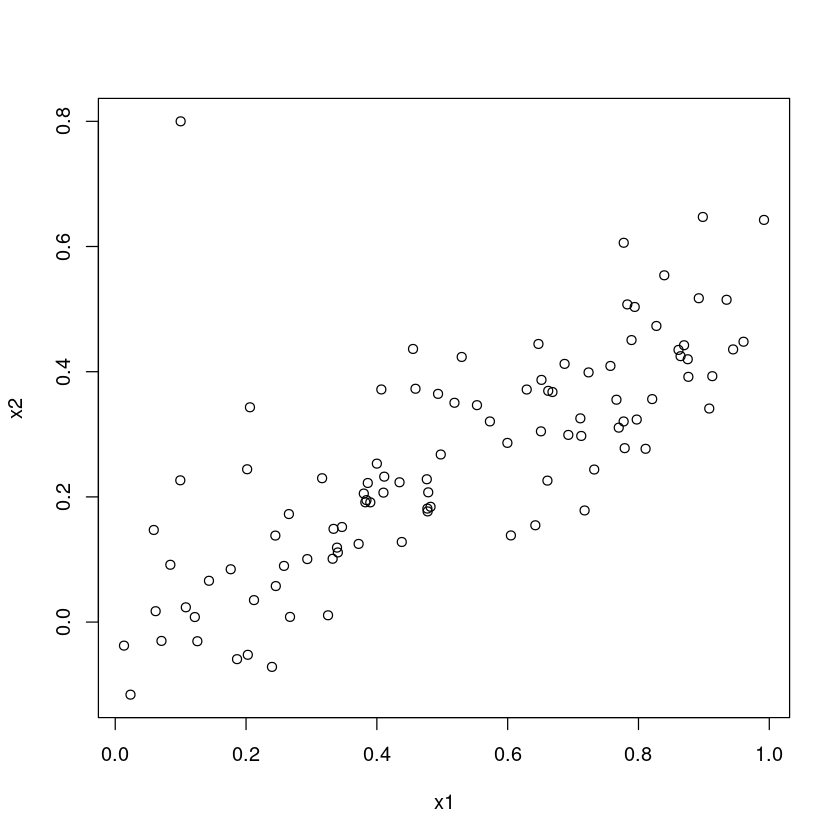

In [87]:
plot(x1,x2)  # 추가된 값이 이상하게 보인다

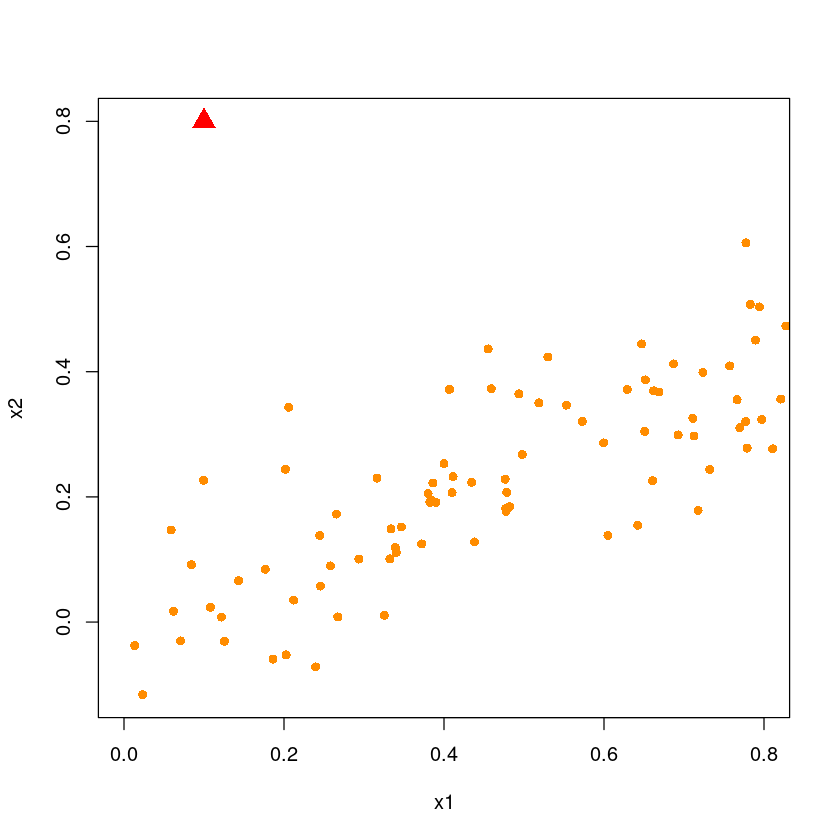

In [91]:
plot(x1, x2, pch=16, col='darkorange', xlim=c(0,0.8))
points(0.1,0.8, pch=17, cex=2, col='red')  #교수님 그림

In [82]:
multi2=lm(y~x1+x2, data=dt2)
summary(multi2)


Call:
lm(formula = y ~ x1 + x2, data = dt2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06


In [83]:
m1_2=lm(y~x1, data=dt2)
summary(m1_2)


Call:
lm(formula = y ~ x1, data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05


In [84]:
m2_2=lm(y~x2, data=dt2)
summary(m2_2)


Call:
lm(formula = y ~ x2, data = dt2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


- 새로운 데이터를 추가한 뒤 중회귀분석 결과 추정된 회귀식은 $\hat{y} = 2.2267 + 0.5394*x_1 + 2.5146*x_2$임. Multiple R-squared$=0.2188$, Adjusted R-squared$=0.2029$로 설명력은 비교적 작게 나타났으나 p-value$=5.564e-06 \approx 0.000006$으로 유의한 모델로 확인됨.
- 회귀계수 유의성 검정 결과 $\hat{\beta}_1$의 p-value는 $0.36458$로 유의수준 0.5보다 크게 나타나 귀무가설을 기각할 수 없으며, $\hat{\beta}_2$의 p-value는 $0.00614$로 유의수준 0.5보다 작게 나타나 $\beta_2 = 0$이라는 귀무가설을 기각함.
- 이는 데이터 추가 전 결과와 상반되는 결과임.

<표. 회귀계수 유의성 검정 결과>
    
||Estimate|Std.Error|t|p-value|
|---|---|---|---|---|
|(Intercept)|2.2267|0.2314|9.624|7.91e-16$\approx 0$|
|x1|0.5394|0.5922|0.911|0.36458|
|x2|2.5146|0.8977|2.801|0.00614|

- x1과 x2에 대해 단순회귀모형을 진행한 결과 데이터 추가 전과 동일하게 $\beta_1=0$,$\beta_2=0$이라는 귀무가설을 기각하여 유의미한 모델로 확인됨. 
- 변경된 추정식은 아래와 같음.

$\hat{y} = 2.2569 + 1.7657*x_1$  

$\hat{y} = 2.3451 + 3.1190*x_2$

`Q.` 추가된 데이터는 이상점/영향점인가?

,x1,x2,y
,<dbl>,<dbl>,<dbl>
82,0.7125147,0.2973679,0.6253191


,x1,x2,y
,<dbl>,<dbl>,<dbl>
101,0.1,0.8,6


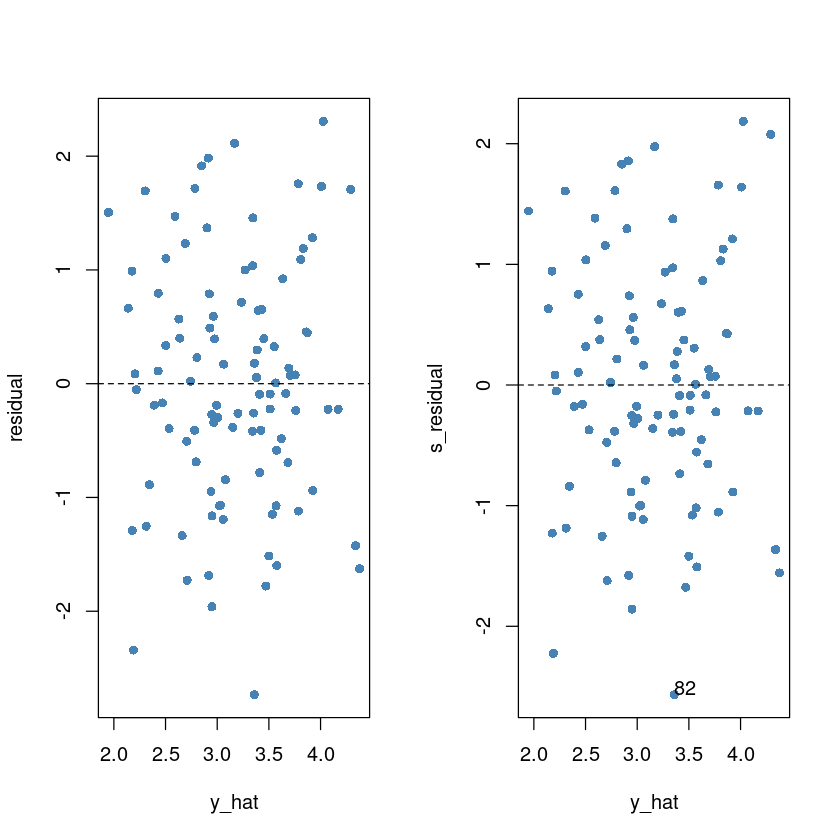

In [85]:
residual <- resid(multi2)
s_residual <- rstandard(multi2)
y_hat <- fitted(multi2)
par(mfrow=c(1,2))
plot(y_hat, residual, pch=16, col='steelblue')
abline(h=0, lty=2)
plot(y_hat, s_residual, pch=16, col='steelblue')
abline(h=0, lty=2)
out <- which.max(abs(s_residual))
text (y_hat[out], s_residual[out], out,adj = c(0,0))
#82번째 데이터 확인
dt2[82,]
dt2[101,]#추가된 데이터

- 중회귀분석 표준화잔차 산점도를 그린 후, 먼저 선형 회귀분석의 기본 가정을 만족하는지 확인함. 
- 잔차가 고르게 분포하고 있어 등분산성을 만족하고 있으며, Shapiro-Wilk Test 결과 정규성을 만족함.
- 표준화잔차 중 절대값이 가장 큰 점을 찾아보니 이상치를 추정한 결과 82번째 데이터로 확인됨.
- 추가된 데이터는 101번째 데이터이기 때문에, 해당 데이터는 **이상점이 아니라고 할 수 있음**.
- 그러나 데이터를 추가한 후 중회귀분석 결과 계수값이 달라져 $\hat{\beta}_1$은 $\beta_1$ 값과 멀어지고, $\hat{\beta}_2$는 $\beta_2$ 값과 비교적 가까워지는 모습을 보였음. 또한 유의한 계수가 $\beta_1$에서 $\beta_2$로 전환되어 추가된 데이터는 **영향점이라고 할 수 있음**. 

**🥸 교수님 풀이 추가**

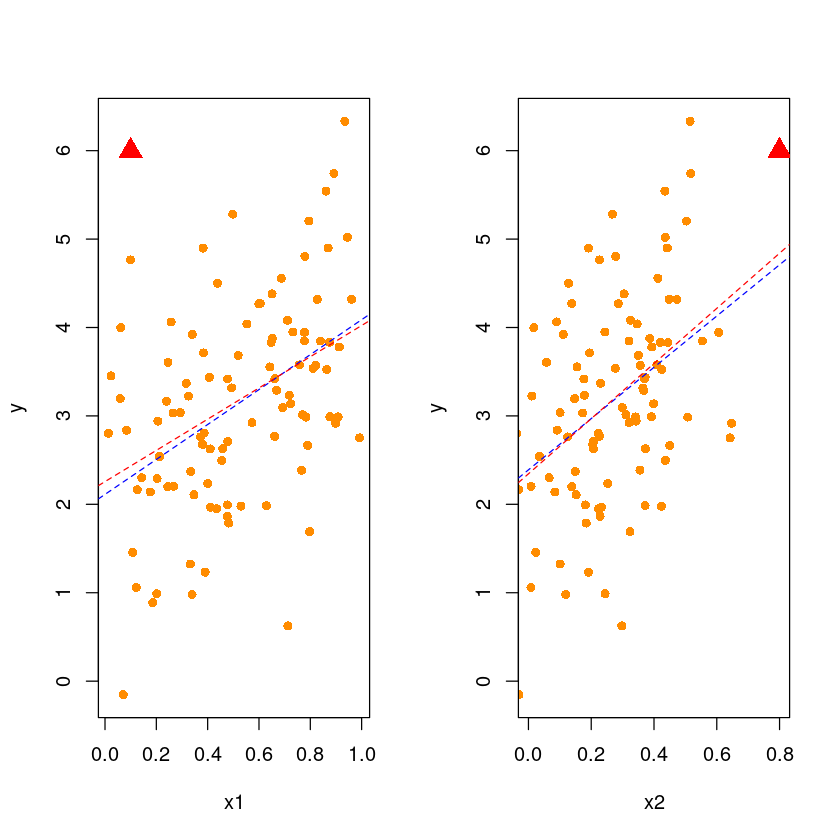

In [93]:
par(mfrow=c(1,2))

plot(x1, y, pch=16, col='darkorange')
points(0.1,6, pch=17, cex=2, col='red')
abline(m1, lty=2, col='blue')
abline(m1_2, lty=2, col='red')


plot(x2, y, pch=16, col='darkorange', xlim=c(0,0.8))
points(0.8,6, pch=17, cex=2, col='red')
abline(m2, lty=2, col='blue')
abline(m2_2, lty=2, col='red')

[중회귀분석]
- 데이터가 추가된 후 회귀계수가 바뀌게 되어서 추가된 데이터는 영향점임.  

[단순회귀분석]
- 파란색은 첫번째 회귀직선, 빨간색이 데이터가 추가된 회귀직선임.
- 크게 변화가 없는 것을 볼 수 있음
- 추가된 데이터를 보면 굉장히 회귀직선에서 멀어서 이상점이라고 봐도 될 것 같음.

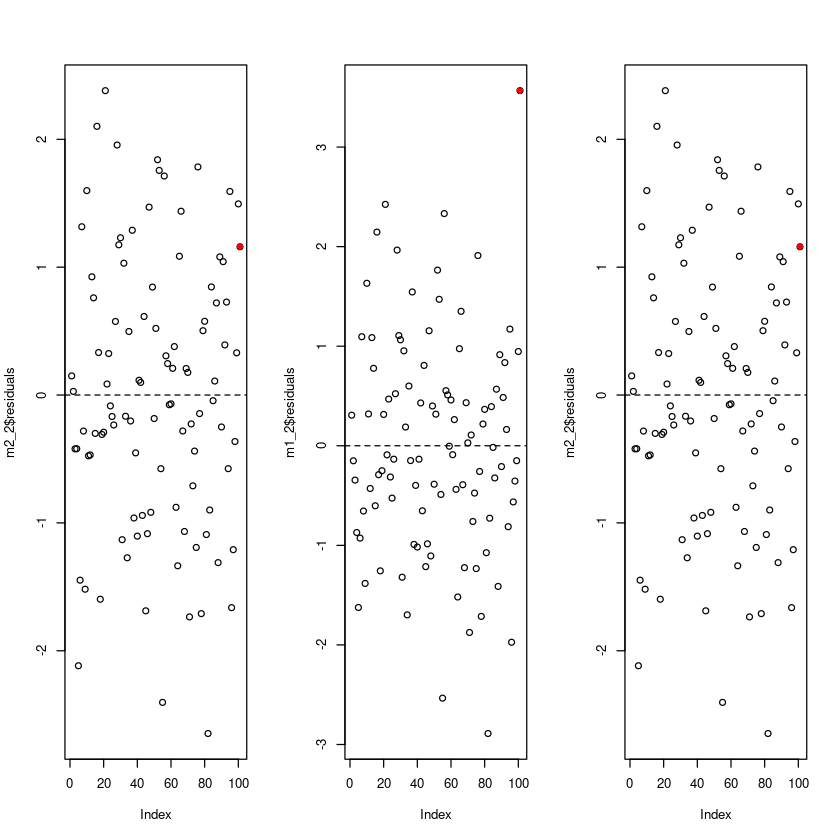

In [95]:
par(mfrow=c(1,3))
plot(m2_2$residuals)
abline(h=0, lty=2)
points(101, m2_2$residuals[101], pch=16, col='red')
plot(m1_2$residuals)
abline(h=0, lty=2)
points(101, m1_2$residuals[101], pch=16, col='red')
plot(m2_2$residuals)
abline(h=0, lty=2)
points(101, m2_2$residuals[101], pch=16, col='red')

- 잔차를 보면 첫번째 변수가 2개일 때와 x2만 사용했을 때는 이상점으로 안 보이고
- x1만 사용했을 때는 이상점으로 보임.

In [99]:
#이상점을 확인하는 코드
#dfb.1_, dfb.x1 값이 크면 이상점
#dffit : 1번 값이 있을 때와 없을 때의 예측값의 차이
#전체적으로 값이 크면 영향값이라고 할 수 있음
influence.measures(m1_2)

Influence measures of
	 lm(formula = y ~ x1, data = dt2) :

       dfb.1_    dfb.x1     dffit cov.r   cook.d     hat inf
1    3.58e-02 -0.025822  0.038012 1.038 7.29e-04 0.01838    
2   -1.27e-02  0.007188 -0.015393 1.033 1.20e-04 0.01266    
3   -8.29e-03 -0.006846 -0.031785 1.029 5.10e-04 0.01038    
4    6.76e-02 -0.118259 -0.142989 1.040 1.03e-02 0.03133    
5   -2.24e-01  0.174309 -0.229826 0.999 2.61e-02 0.02331    
6    6.92e-02 -0.122688 -0.149552 1.037 1.12e-02 0.03028    
7   -9.78e-02  0.163415  0.192462 1.037 1.85e-02 0.03548    
8    1.40e-03 -0.032515 -0.067605 1.026 2.30e-03 0.01288    
9   -1.02e-02 -0.054069 -0.136768 1.000 9.30e-03 0.01174    
10   2.99e-01 -0.257686  0.299628 1.013 4.43e-02 0.03803    
11   4.31e-02 -0.033437  0.044349 1.043 9.93e-04 0.02294    
12  -6.19e-02  0.049345 -0.063047 1.044 2.00e-03 0.02556    
13  -1.09e-02  0.063756  0.117449 1.015 6.90e-03 0.01404    
14   6.27e-02 -0.034000  0.078127 1.023 3.07e-03 0.01221    
15   2.11e-02 -0.052353 -

---

### Logistic Regression

**1. 두개의 설명변수 (X1 = 공부시간, X2 = 학부평점)를 이용하여 A학점을 받을 확률을 예측하기 위해 로지스틱 회귀모형을 적합하였다. 추정된 회귀계수는 $\hat{\beta}_0 = −6, \hat{\beta}_1 = 0.05, \hat{\beta}_2 = 1$이다.**

(a) 40시간 공부하고, 평점이 3.5인 학생이 A를 받았을 확률을 예측하여라.

In [26]:
x1=40
x2=3.5
pr=exp(-6+0.05*x1+1*x2)/(1+exp(-6+0.05*x1+1*x2));pr

[1] 0.3775407

(b) 평점이 3.5인 학생은 얼마나 공부를 해야 A를 받을 확률이 50%를 넘을 것인가?

In [40]:
odds_ratio=exp(0.05);odds_ratio 

[1] 1.051271

- 공부시간이 1 unit 증가할 때 A를 맞을 확률이 1.05배 정도 커진다.

In [47]:
0.5/0.37754066879814

[1] 1.324361

In [49]:
log(1.32436063535008)/log(1.05127109637602)

[1] 5.618596

In [51]:
new=x1+6
pr=exp(-6+0.05*new+1*x2)/(1+exp(-6+0.05*new+1*x2));pr

[1] 0.5124974

---

**2. 다음은 odds에 관한 문제이다.**

(a) 신용카드결재 문제에서 결재를 하지 못하는 경우(default)에 대한 odds가 0.37인 사람들이 실제로 defalut할 확률은 평균적으로 얼마인가?

- odds가 0.37이라는 의미는 결재 YES 확률이 결재 NO 확률보다 $\frac{100}{37}$배 더 크다는 의미임.

In [56]:
100/37

[1] 2.702703

- 사람들이 실제로 결재 NO할 확률은  
$p+p*2.7027027027027 = 1$  
$3.7027027027027*p=1$  
$p=\frac{1}{3.7027027027027}=0.27007299270073$  

In [57]:
1/3.7027027027027

[1] 0.270073

In [59]:
0.37/1.37
#오즈 정의로 바로 계산

[1] 0.270073

(b) 어떤 개인이 default할 확률이 16% 라고 하자. 그 사람이 default할 odds는 얼마인가?

In [61]:
p=0.16
odds=p/(1-p);odds

[1] 0.1904762